<a href="https://colab.research.google.com/github/suchy1713/expected_goals/blob/master/xg_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://raw.githubusercontent.com/suchy1713/expected_goals/master/data.csv')
X = df.drop(['is_goal'], axis=1)
y = df['is_goal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [3]:
!pip install shap

     |████████████████████████████████| 266kB 2.8MB/s 
  Created wheel for shap: filename=shap-0.34.0-cp36-cp36m-linux_x86_64.whl size=383183 sha256=fdab364dc0905a571a1e5a403a5d10f611dae7672b4ea902e39fa3441d105896
  Stored in directory: /root/.cache/pip/wheels/28/7e/28/57bc9fcb77579b0df6561298648249370648c0b91dfe42c8ec
Successfully built shap


In [7]:
import xgboost as xgb

brain = xgb.XGBClassifier(max_depth=5, min_child_weight=5, subsample=0.56, colsample_bytree=0.72, learning_rate=0.214, n_estimators=200)
brain.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.72, gamma=0,
              learning_rate=0.214, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.56, verbosity=1)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


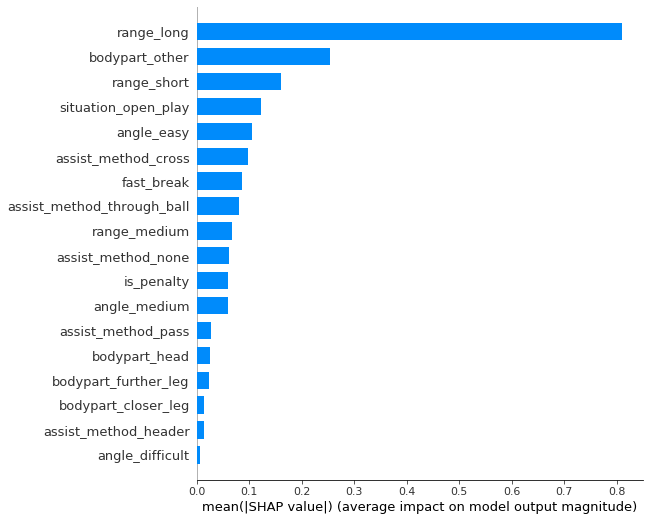

In [9]:
import shap

explainer = shap.TreeExplainer(brain)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type='bar')

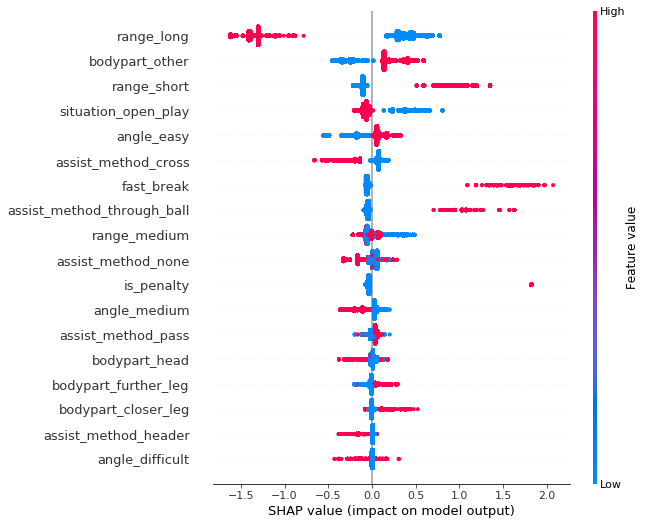

In [10]:
shap.summary_plot(shap_values, X_test)